In [1393]:
#load modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1394]:
#load data
train_df = pd.read_csv('train.csv', nrows = 50_000, parse_dates = ['pickup_datetime']).drop(columns = 'key')
train_df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [1395]:
train_df.shape

(50000, 7)

In [1396]:
#data type
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        50000 non-null  float64            
 1   pickup_datetime    50000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   50000 non-null  float64            
 3   pickup_latitude    50000 non-null  float64            
 4   dropoff_longitude  50000 non-null  float64            
 5   dropoff_latitude   50000 non-null  float64            
 6   passenger_count    50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 2.7 MB


In [1397]:
# missing values
train_df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [1398]:
#check columns
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [1399]:
train_df.drop(train_df[train_df['pickup_longitude'] >= -71].index, axis=0, inplace = True)
train_df.drop(train_df[train_df['pickup_latitude'] <= 40].index, axis=0, inplace = True)
train_df.drop(train_df[train_df['dropoff_longitude'] >= -71].index, axis=0, inplace = True)
train_df.drop(train_df[train_df['dropoff_latitude'] <= 40].index, axis=0, inplace = True)

train_df.drop(train_df[train_df['pickup_longitude'] <= -79].index, axis=0, inplace = True)
train_df.drop(train_df[train_df['pickup_latitude'] >= 45].index, axis=0, inplace = True)
train_df.drop(train_df[train_df['dropoff_longitude'] <= -79].index, axis=0, inplace = True)
train_df.drop(train_df[train_df['dropoff_latitude'] >= 45].index, axis=0, inplace = True)

train_df.drop(train_df[train_df['fare_amount'] <= 0].index, axis=0, inplace = True)
train_df.drop(train_df[train_df['passenger_count'] > 6].index, axis=0, inplace = True)
train_df.drop(train_df[train_df['passenger_count'] <= 0].index, axis=0, inplace = True)



In [1400]:
train_df['year'] = pd.to_datetime(train_df['pickup_datetime']).dt.year
# train_df['month'] = pd.to_datetime(train_df['pickup_datetime']).dt.month
# train_df['day'] = pd.to_datetime(train_df['pickup_datetime']).dt.day
train_df['hour'] = pd.to_datetime(train_df['pickup_datetime']).dt.hour

train_df.drop(columns=['pickup_datetime'], inplace=True)

In [1401]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,hour
count,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000
mean,11.366179,-73.975192,40.751205,-73.973997,40.751667,1.674769,2011.739967,13.482537
std,9.660895,0.041111,0.033241,0.039559,0.036246,1.288788,1.867948,6.504478
min,0.010000,-75.423848,40.121653,-75.354559,40.164927,1.000000,2009.000000,0.000000
25%,6.000000,-73.992312,40.736521,-73.991333,40.735916,1.000000,2010.000000,9.000000
50%,8.500000,-73.982124,40.753451,-73.980490,40.754127,1.000000,2012.000000,14.000000
75%,12.500000,-73.968378,40.767783,-73.965334,40.768482,2.000000,2013.000000,19.000000
max,200.000000,-72.856968,43.098708,-72.854940,43.415190,6.000000,2015.000000,23.000000


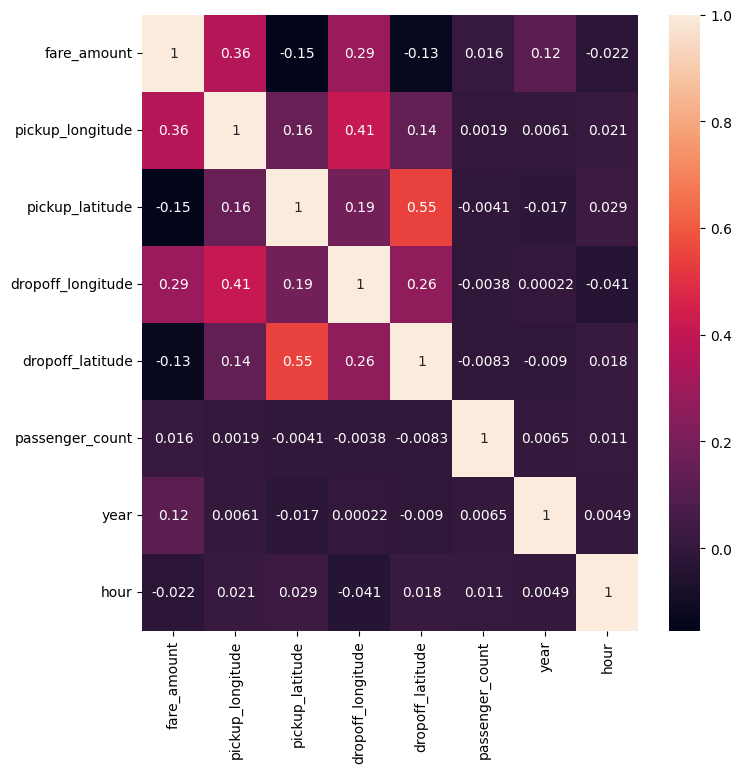

In [1402]:
plt.figure(figsize=(8,8))
sns.heatmap(train_df.corr(),annot=True)
plt.show()

In [1403]:
corr_matrix = train_df.corr()
corr_matrix["fare_amount"].sort_values(ascending = False)

fare_amount          1.000000
pickup_longitude     0.360015
dropoff_longitude    0.287870
year                 0.120592
passenger_count      0.015640
hour                -0.022002
dropoff_latitude    -0.131536
pickup_latitude     -0.154324
Name: fare_amount, dtype: float64

In [1404]:
from geopy.distance import geodesic

def make_distance(lat1,lon1,lat2,lon2):
    pickup = (lat1,lon1)
    dropoff = (lat2,lon2)
    dis = geodesic(pickup, dropoff).km
    return dis

In [1405]:
# make distance
distances = []
for i in range(len(train_df)):
    distance = make_distance(train_df.iloc[i,2],train_df.iloc[i,1],train_df.iloc[i,4],train_df.iloc[i,3])
    distances.append(distance)

train_df["distance"] = distances
train_df.drop(train_df[train_df['distance'] <= 0].index, axis=0, inplace = True)
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,hour,distance
count,48256.000000,48256.000000,48256.000000,48256.000000,48256.000000,48256.000000,48256.000000,48256.000000,48256.000000
mean,11.367711,-73.975476,40.751162,-73.974268,40.751628,1.676144,2011.744467,13.484872,3.400165
std,9.559918,0.038778,0.031865,0.037120,0.035023,1.290350,1.869585,6.505254,3.990250
min,0.010000,-75.423848,40.121653,-75.354559,40.164927,1.000000,2009.000000,0.000000,0.000085
25%,6.000000,-73.992327,40.736528,-73.991340,40.735930,1.000000,2010.000000,9.000000,1.288874
50%,8.500000,-73.982140,40.753464,-73.980515,40.754148,1.000000,2012.000000,14.000000,2.186000
75%,12.500000,-73.968514,40.767798,-73.965507,40.768515,2.000000,2013.000000,19.000000,3.973273
max,200.000000,-72.856968,43.098708,-72.854940,43.415190,6.000000,2015.000000,23.000000,122.542535


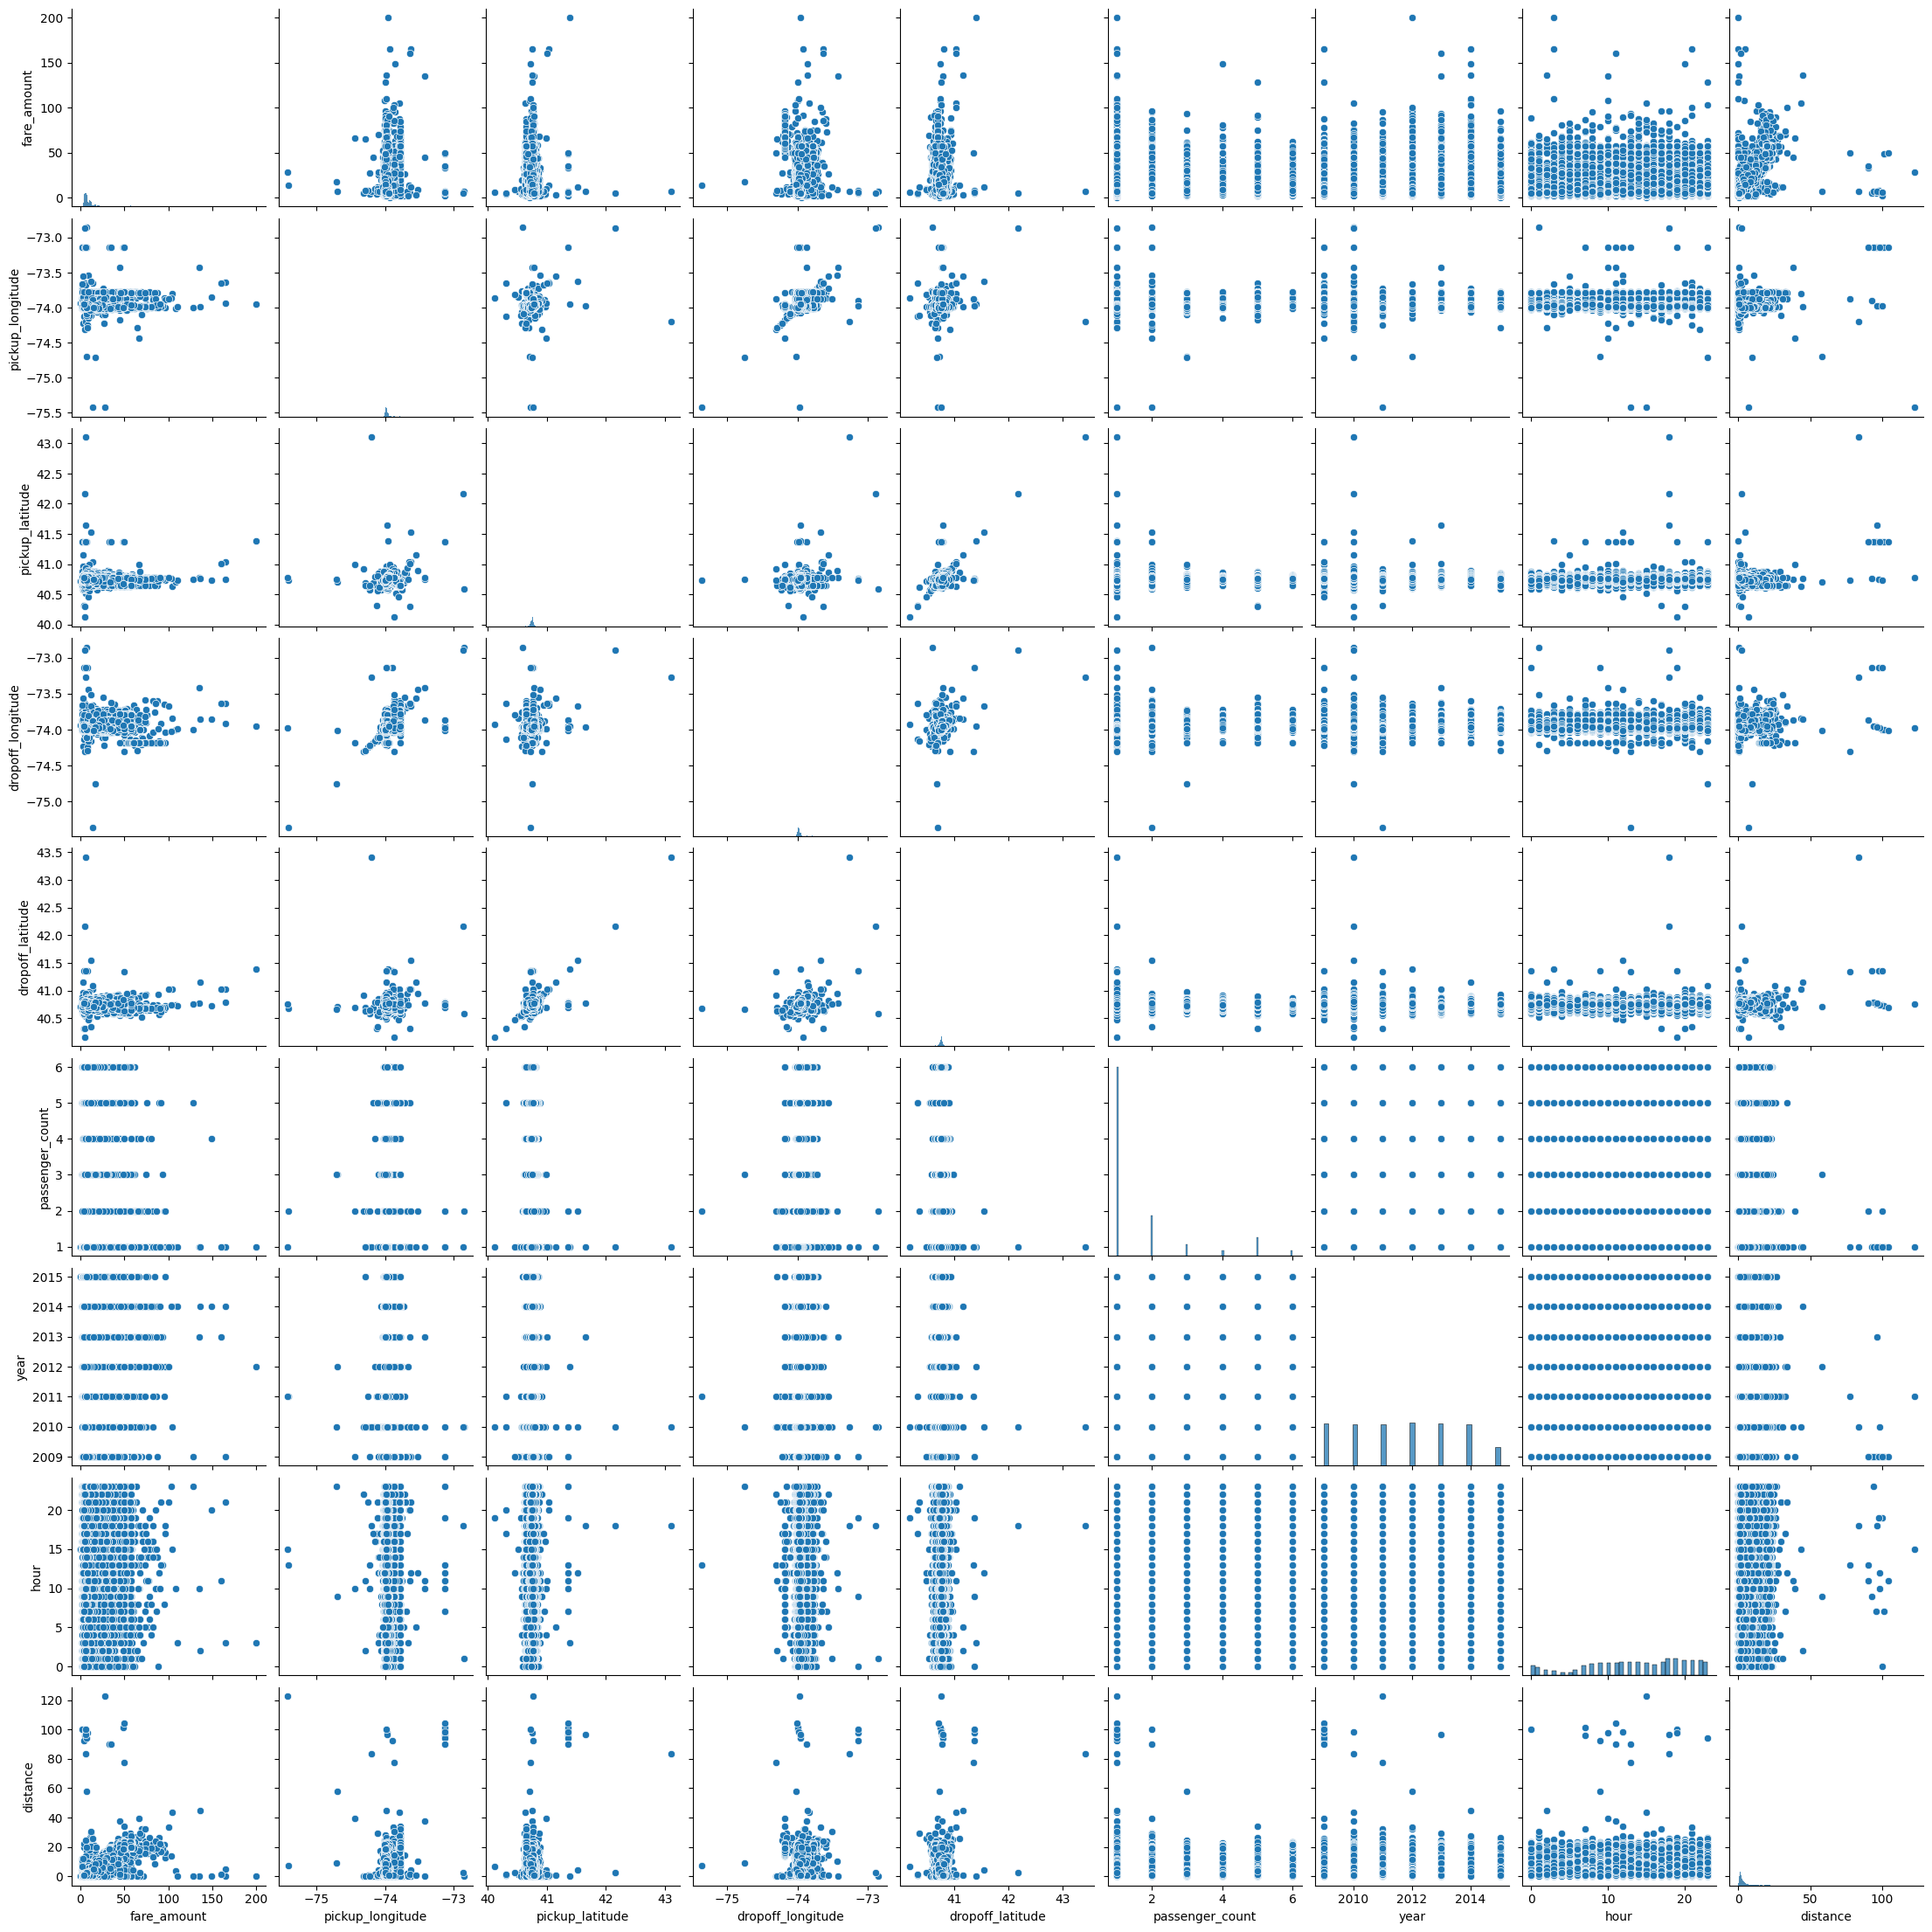

In [1406]:
# Checking the pairplot
sns.pairplot(train_df)
plt.show()

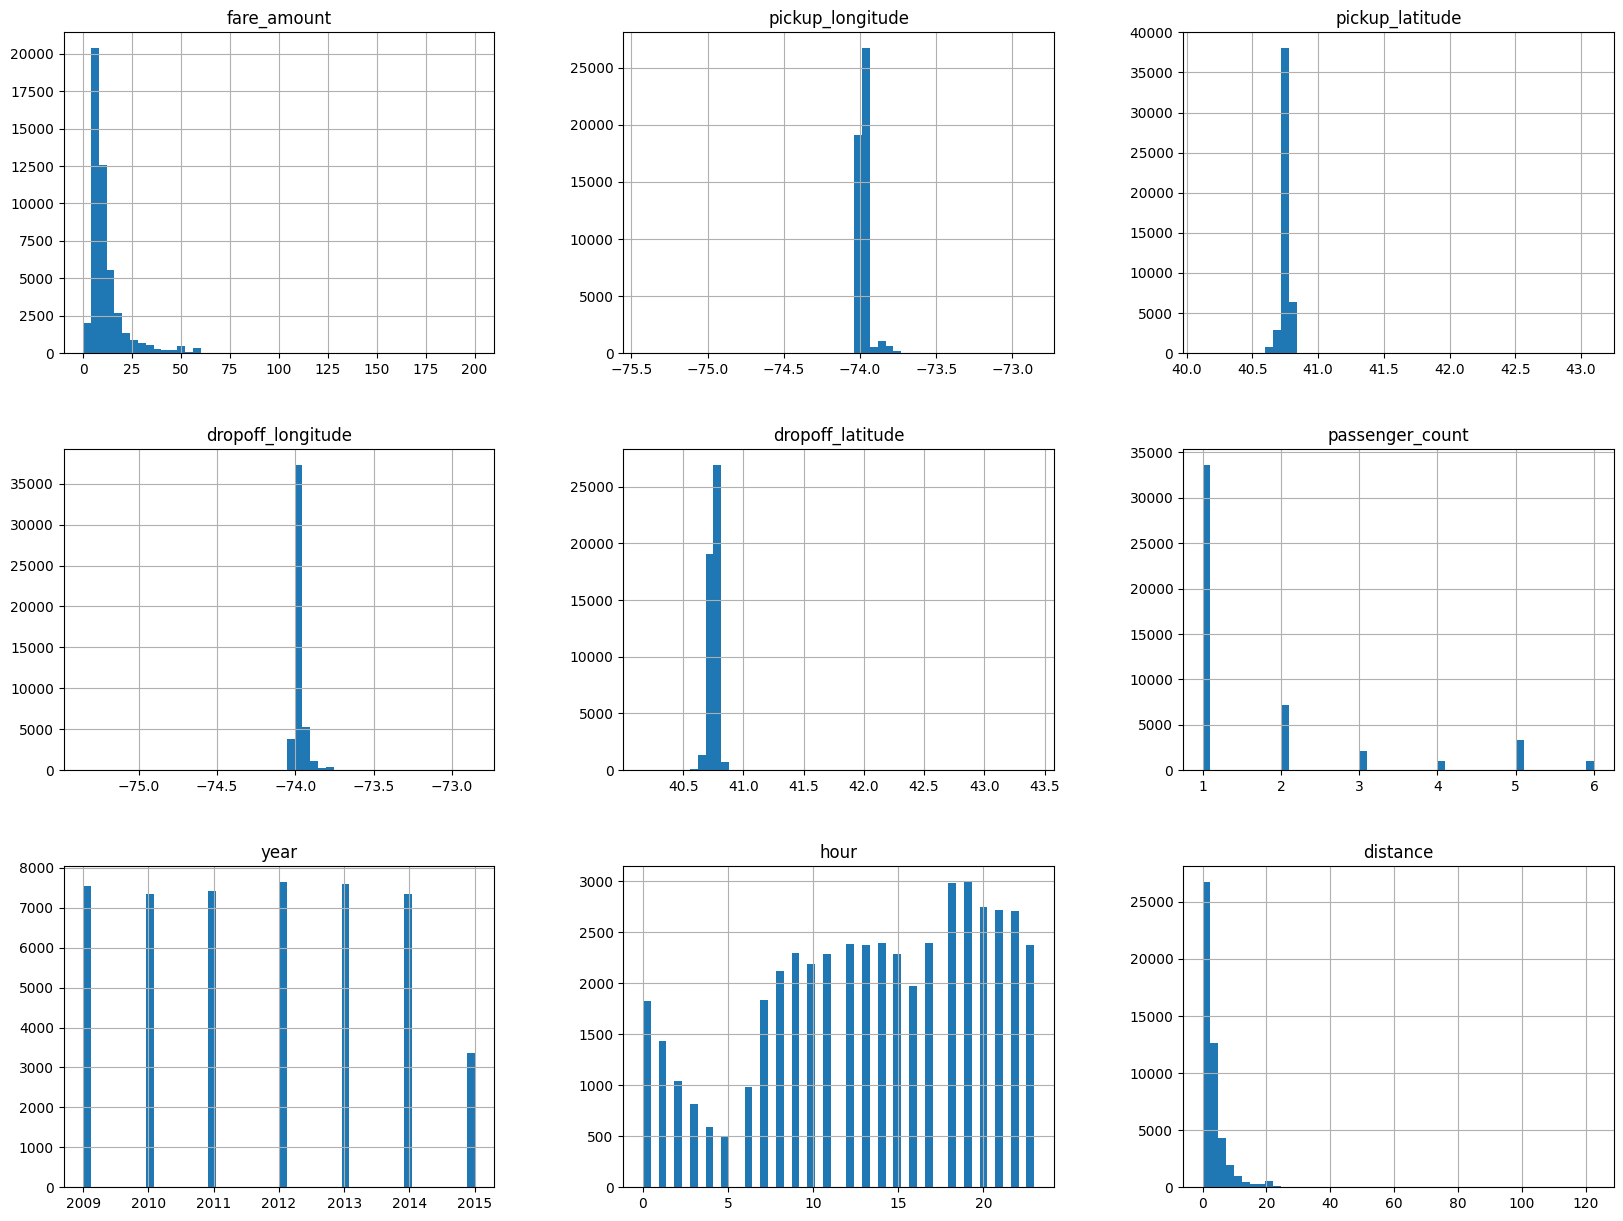

In [1407]:
#Hists
train_df.hist(bins = 50, figsize = (20, 15))
plt.show()

In [1408]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [1409]:
X, y = train_df[['year', 'hour', 'distance', 'passenger_count']], train_df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [1410]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1411]:
model = LinearRegression().fit(X_train, y_train)

In [1412]:
y_pred = model.predict(X_test)

In [1413]:
print("Actual      \t Predicted")
for exp, act in zip(y_test.head(10), y_pred[:10]):
    print('{:.5f} \t {:.5f} ({:+.2f}%)'.format(exp, act, (act - exp) * 100/exp))

Actual      	 Predicted
5.00000 	 9.09085 (+81.82%)
14.00000 	 15.99046 (+14.22%)
6.50000 	 8.85084 (+36.17%)
6.50000 	 7.36302 (+13.28%)
12.00000 	 9.24472 (-22.96%)
4.50000 	 5.90841 (+31.30%)
5.70000 	 8.68021 (+52.28%)
4.90000 	 5.77760 (+17.91%)
16.50000 	 14.33300 (-13.13%)
5.50000 	 8.87885 (+61.43%)


In [1414]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))
score = r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

MAE: 2.5377815801421653
MSE: 30.61710754779011
RMSE: 5.5332727700512025
R-squared: 0.6491886396738946
The accuracy of our model is 65.0%


In [1415]:
#Random Search
param_dist = {'fit_intercept': [True, False],
             'copy_X': [True, False],
             'positive': [True, False]}
n_iter_search = 8
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=n_iter_search, cv=5)
random_search.fit(X_train, y_train)

print("Best hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best hyperparameters:  {'positive': True, 'fit_intercept': True, 'copy_X': True}
Best score:  0.6237077285905894


In [1416]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1417]:
class LinearRegression:
    
    def __init__(self, alpha=0.01, eps=0.01, numiters=1500):
        self.alpha = alpha
        self.eps = eps
        self.numiters = numiters
        
    def normalize(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        X_new = (X - self.mean) / self.std
        return X_new
    
    def prepare_X(self, X):
        m = X.shape[0]
        ones = np.ones((m, 1))
        X_new = np.array(X[:])
        X_new = np.column_stack((ones, X_new))
        return X_new
    
    def hypothesis(self, X, theta):
        h_thetha = np.dot(X, theta)
        return h_thetha
    
    def cost_function(self, X, y, theta):
        m = X.shape[0]
        if m == 0:
            return None
        J = sum((self.hypothesis(X, theta) - y) ** 2) / (2 * m)
        return J
    
    def derivative(self, X, y, theta):
        m = X.shape[0]
        d_thetha = np.dot(self.hypothesis(X,theta) - y, X) / m
        return d_thetha
    
    def gradient_descent(self, X, y, theta, print_J=True):
        m = X.shape[0]
        J_history = []
        J = self.cost_function(X, y, theta)
        if print_J:
            print(J)
        J_history.append(J)
        i = 0
        while True:
            delta = self.derivative(X, y, theta)
            theta = theta - delta * self.alpha
            J = self.cost_function(X, y, theta)
            J_history.append(J)
            i += 1
            if print_J:
                print(J)
            if ((abs(J_history[-1] - J_history[-2]) < self.eps) or (i > self.numiters)):
                break
        return theta, J_history
    
    def Predict(self, X):
        X = (X - self.mean) / self.std
        X = self.prepare_X(X)
        predicted = self.hypothesis(X, self.theta)
        return predicted
    
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train_norm = self.normalize(X_train)
        X_prep = self.prepare_X(X_train_norm)
        y_prep = y_train[:]
        theta = np.zeros(X_prep.shape[1])
        new_theta, Js = self.gradient_descent(X_prep, y_prep, theta)
        self.theta = new_theta
        
    def evaluate(self, X_test, y_test):
        y_test_pred = self.Predict(X_test)
        rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100
        print('MAE:', mean_absolute_error(y_test, self.Predict(X_test)))
        print('MSE:', mean_squared_error(y_test, self.Predict(X_test)))
        print('RMSE:', np.sqrt(mean_squared_error(y_test, self.Predict(X_test))))
        print('R^2 score:', r2_score(y_test, self.Predict(X_test)))
        print('Mean relative difference (%):', np.mean(rel_diff))


In [1418]:
lin_reg = LinearRegression(alpha=0.01, eps=0.0001, numiters=2000)

In [1419]:
# Fit the model using the training set
lin_reg.fit(X_train, y_train)

110.03252136450504
108.1673640921525
106.33940449029171
104.54790038097704
102.79212440090001
101.07136370554727
99.38491967926906
97.73210765113352
96.11225661646041
94.52470896392627
92.96882020810502
91.44395872736946
89.9495055070146
88.48485388751953
87.04940931784027
85.64258911362437
84.26382222025823
82.91254898065482
81.5882209076697
80.2903004610635
79.01826082893666
77.77158571350128
76.54976912116194
75.3523151567713
74.17873782199821
73.02856081772997
71.9013173504131
70.79654994227218
69.71381024530798
68.65265885902237
67.6126651517725
66.5934070857064
65.59447104518078
64.61545166862022
63.65595168372204
62.71558174596155
61.79396028032006
60.890713326172644
60.0054743852736
59.13788427278455
58.287590971265345
57.45424948759558
56.63752171274298
55.837076284335076
55.052588451981386
54.28373994527699
53.530218844444065
52.79171945356392
52.06794217632981
51.358593394293365
50.66338534752792
49.9820360176894
49.31426901340249
48.65981345794227
48.01840387915172
47.38978

In [1421]:
# Evaluate the model using the testing set
lin_reg.evaluate(X_test, y_test)

MAE: 2.5541999695349653
MSE: 33.53066880445566
RMSE: 5.790567226486163
R^2 score: 0.624606695961666
Mean relative difference (%): 24.88645697944359
